    # Output CN plot

In [1]:
# imports
import scgenome.plotting as pl
import h5py
import anndata
import numpy as np

/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/si

In [2]:
# read output h5
out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr006/out_k6a7n1314m6206.h5') # 006
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr014/out_k6a7n1105m6206.h5') # 014
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr107/out_k6a7n608m6206.h5') # 107
# out_file = h5py.File('/Users/zemp/phd/scilife/cpt_experiments/output/spectr107/out_k6a7n608m6206_pi1-10.h5') # 107x
out_file.keys()

<KeysViewHDF5 ['X', 'result']>

In [3]:
for k in out_file['result'].keys():
    ds = out_file['result'][k]
    if isinstance(ds, h5py.Dataset):
        print(k, out_file['result'][k].shape)

cell_assignment (1314, 6)
cn_marginal (6, 6206, 7)
cn_viterbi (6, 6206)
eps_alpha (6, 6)
eps_beta (6, 6)
graph (6, 6)
mu_tau (4, 1314)


In [4]:
# get cell assignment and cell copy number
top_z = out_file['result']['cell_assignment'][...].argmax(axis=1)
clone_cn_np = out_file['result']['cn_viterbi'][...]
cell_cn = clone_cn_np[top_z, :]
cell_cn.shape

(1314, 6206)

In [5]:
# create anndata
adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-006.h5')
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-014.h5')
# adata = anndata.read_h5ad('/Users/zemp/Downloads/data/signals_SPECTRUM-OV-107.h5')
adata.layers['victree-cn'] = cell_cn
adata.layers['marginal'] = np.argmax(out_file['result']['cn_marginal'], axis=-1)[top_z, ...]
adata.obs['clone'] = top_z

{'ax': <Axes: xlabel='chromosome'>,
 'im': <matplotlib.image.AxesImage at 0x16a47bac0>,
 'adata': View of AnnData object with n_obs × n_vars = 1314 × 6206
     obs: 'multiplier', 'MSRSI_non_integerness', 'MBRSI_dispersion_non_integerness', 'MBRSM_dispersion', 'autocorrelation_hmmcopy', 'cv_hmmcopy', 'empty_bins_hmmcopy', 'mad_hmmcopy', 'mean_hmmcopy_reads_per_bin', 'median_hmmcopy_reads_per_bin', 'std_hmmcopy_reads_per_bin', 'total_mapped_reads_hmmcopy', 'total_halfiness', 'scaled_halfiness', 'mean_state_mads', 'mean_state_vars', 'mad_neutral_state', 'breakpoints', 'mean_copy', 'state_mode', 'log_likelihood', 'true_multiplier', 'column', 'img_col', 'index_i5', 'index_i7', 'is_control', 'library_id', 'primer_i5', 'primer_i7', 'row', 'sample_id', 'sample_type', 'cell_call', 'experimental_condition', 'order', 'is_s_phase', 'is_s_phase_prob', 'quality', 'paired_mapped_reads', 'unmapped_reads', 'estimated_library_size', 'expected', 'fastqscreen_mm10', 'total_reads', 'standard_deviation_inse

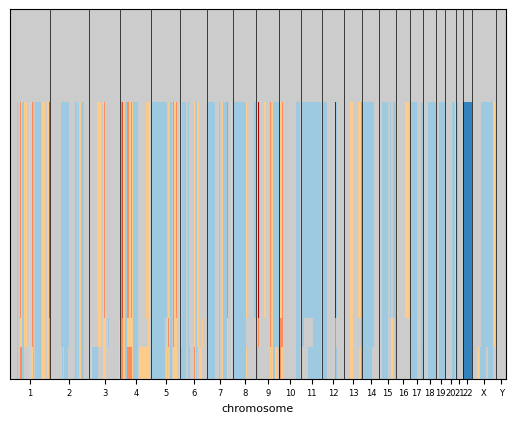

In [6]:
pl.plot_cell_cn_matrix (adata, 'victree-cn', cell_order_fields=['clone'], max_cn=7)

<Axes: xlabel='chromosome'>

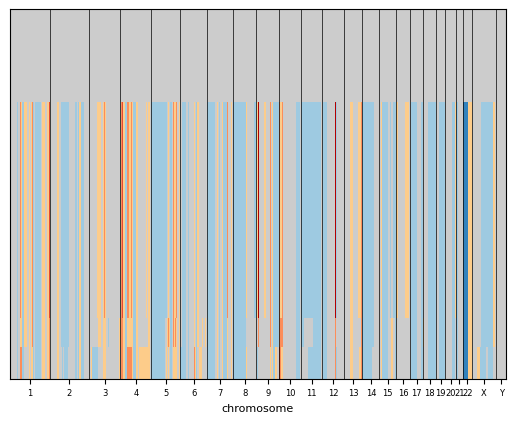

In [7]:
pl.plot_cell_cn_matrix(adata, 'marginal', cell_order_fields=['clone'], max_cn=7)['ax']

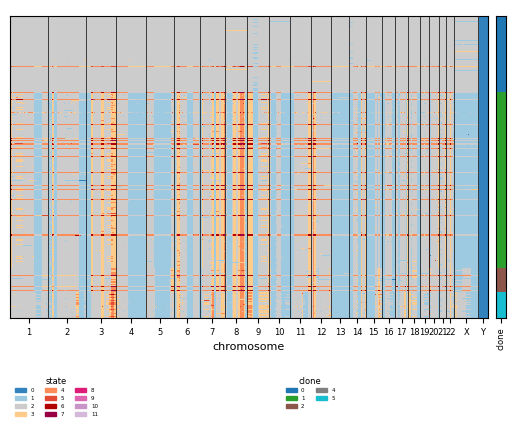

In [16]:
g = pl.plot_cell_cn_matrix_fig(adata, 'state', cell_order_fields=['clone'], annotation_fields=['clone'], max_cn=7)

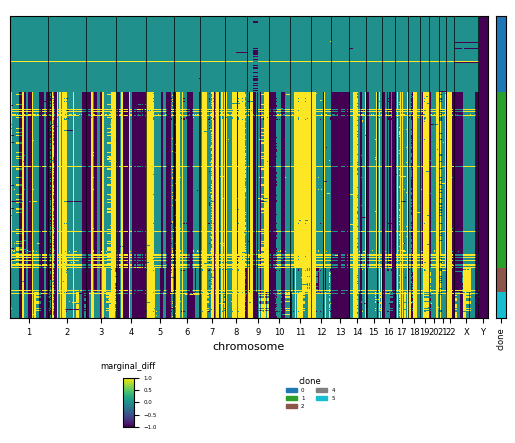

In [9]:
# sort cells based on cluster assignment
adata.obs['clone'] = adata.obs['clone'].astype('category')
adata.layers['marginal_diff'] = adata.layers['state'] - adata.layers['marginal']
g = pl.plot_cell_cn_matrix_fig(
    adata, 'marginal_diff', cell_order_fields=['clone', 'cell_order'],
    annotation_fields=['clone'], max_cn=7, raw=True, vmin=-1, vmax=1)

In [31]:
import numpy as np
np.unique(top_z, return_counts=True)

(array([0, 5]), array([724, 381]))

In [32]:
out_file['result']['trees'].keys()

<KeysViewHDF5 ['newick', 'weight']>

In [33]:

for t in zip(out_file['result']['trees']['newick'], out_file['result']['trees']['weight']):
    print(t[0])
    print(t[1])
    print('---')

b'((2,(1,5)4)3)0'
0.02043939
---
b'((((5)2)1,3)4)0'
0.013640878
---
b'(((5)1,(3)2)4)0'
0.013598051
---
b'(1,(2,(5)3)4)0'
0.013593179
---
b'((2,(3)4)1,5)0'
0.013571922
---
b'((3,5)2,(1)4)0'
0.013564752
---
b'(2,(1,4)3,5)0'
0.01355846
---
b'((1,4)2,3,5)0'
0.013556236
---
b'((2,((5)3)4)1)0'
0.013550264
---
b'((1)2,(4,5)3)0'
0.013547564
---
b'((1,(3)2,5)4)0'
0.013543362
---
b'(((4,5)2,3)1)0'
0.013538791
---
b'(((2,3)4,5)1)0'
0.0135366
---
b'((1,(2,5)4)3)0'
0.0135211
---
b'((4)1,(2,5)3)0'
0.013488823
---
b'(((3)1,5)2,4)0'
0.013478719
---
b'(1,(((5)2)4)3)0'
0.013476964
---
b'((2,(3,5)4)1)0'
0.013476209
---
b'(2,((1,5)4)3)0'
0.0134605905
---
b'(((2,(5)4)1)3)0'
0.01343996
---
b'((3,5)1,(4)2)0'
0.0134385275
---
b'(((5)2,3)1,4)0'
0.013409871
---
b'(((3)1)2,(5)4)0'
0.013383034
---
b'((2)1,(5)3,4)0'
0.013311512
---
b'(((3,(1)4)2)5)0'
0.012144192
---
b'(((1,(4)2)3)5)0'
0.012141792
---
b'(((1,2,4)3)5)0'
0.012141299
---
b'((((4)1,2)3)5)0'
0.01205685
---
b'((((1)5)2,3)4)0'
0.012046414
---
b'(((((1)5)3